<a href="https://colab.research.google.com/github/SohrabSamimi/Artificial-Neural-Networks/blob/master/ANN_August_4th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks DSTI Project

## Exploring the Scikit Learn Digits dataset

We import a few packages and then we import the load_digits dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()
print(digits.data.shape,digits.target.shape)

(1797, 64) (1797,)


We see that the load_digits dataset contains 1797 samples(the images) each of them having 64 features.We confirm that the number of target values matches the number of samples by looking at the target's shape.

Let us display a few images from the dataset:

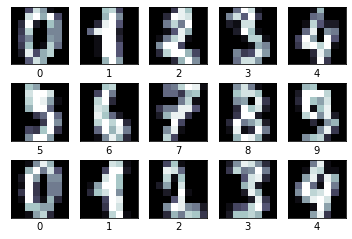

In [3]:
fig, ax = plt.subplots(3, 5)
ax.flatten()
for i, axes in enumerate(ax.flat):
    axes.imshow(digits.images[i], cmap='bone')
    axes.set(xticks=[], yticks=[],
            xlabel=digits.target_names[digits.target[i]])

Now,we make training set,testing set,and we make predictions on the test set Xtest.




In [4]:
from sklearn.model_selection import train_test_split
from sklearn import svm
clf = svm.SVC()
X,y=digits.data,digits.target
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=43)
clf.fit(X,y)
yfit=clf.predict(Xtest)
yfit

array([1, 8, 3, 8, 6, 0, 6, 5, 1, 1, 7, 1, 3, 9, 2, 6, 0, 4, 7, 4, 7, 0,
       0, 8, 5, 0, 8, 2, 3, 3, 8, 6, 9, 8, 0, 7, 6, 9, 4, 8, 9, 6, 4, 0,
       4, 6, 4, 4, 6, 0, 5, 0, 5, 4, 5, 9, 7, 5, 7, 4, 4, 6, 4, 6, 5, 4,
       1, 5, 6, 4, 7, 4, 2, 6, 7, 4, 0, 4, 0, 8, 8, 0, 3, 5, 9, 6, 0, 5,
       3, 0, 0, 4, 6, 9, 6, 6, 9, 4, 6, 9, 3, 7, 8, 9, 7, 0, 3, 3, 6, 7,
       5, 2, 1, 9, 7, 7, 7, 7, 7, 0, 9, 2, 5, 7, 7, 4, 8, 3, 2, 6, 8, 0,
       1, 6, 4, 4, 8, 0, 9, 0, 1, 6, 1, 7, 3, 2, 0, 5, 0, 7, 8, 9, 6, 0,
       1, 5, 7, 1, 0, 7, 4, 1, 7, 9, 8, 2, 6, 4, 9, 7, 7, 5, 8, 0, 2, 9,
       5, 6, 4, 5, 4, 2, 9, 6, 4, 1, 8, 7, 8, 7, 2, 6, 1, 6, 1, 4, 2, 6,
       1, 8, 3, 6, 9, 0, 8, 2, 9, 4, 7, 9, 8, 4, 5, 2, 1, 4, 1, 8, 6, 2,
       9, 8, 1, 8, 1, 5, 2, 8, 8, 5, 9, 2, 9, 2, 9, 2, 1, 8, 8, 9, 6, 8,
       3, 1, 0, 3, 1, 1, 5, 4, 7, 6, 2, 4, 6, 4, 9, 9, 2, 0, 6, 5, 6, 0,
       3, 7, 5, 0, 0, 3, 4, 5, 8, 9, 2, 1, 6, 7, 9, 6, 9, 3, 3, 7, 4, 3,
       5, 8, 9, 4, 0, 0, 9, 1, 4, 0, 4, 3, 7, 6, 3,

In [5]:
Xtrain[0].shape

(64,)

The following code creates a matrix called "y_multilabel" composed of two labels for each image: the first label indicates if the value is above 7 and the second indicates if the value is odd.Then we train an instance of KNeighborsClassifier on the 'multilabeled' matrix.We can then perform a prediction and we notice we obtain two labels('False' and 'True'): 

In [6]:
from sklearn.neighbors import KNeighborsClassifier
ytrain_large=(ytrain>=7)
ytrain_odd=(ytrain %2 == 1)
y_multilabel = np.c_[ytrain_large, ytrain_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(Xtrain,y_multilabel)
prediction = knn_clf.predict(Xtest)
print(prediction)


[[False  True]
 [ True False]
 [False  True]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False  True]
 [False  True]
 [False  True]
 [ True  True]
 [False  True]
 [False  True]
 [ True  True]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True  True]
 [False False]
 [ True  True]
 [False False]
 [False False]
 [ True False]
 [False  True]
 [False False]
 [ True False]
 [False False]
 [False  True]
 [False  True]
 [ True False]
 [False False]
 [ True  True]
 [False  True]
 [False False]
 [ True  True]
 [False False]
 [ True  True]
 [False False]
 [ True False]
 [ True  True]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False  True]
 [False False]
 [False  True]
 [False False]
 [False  True]
 [ True  True]
 [ True  True]
 [False  True]
 [ True  True]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False  True]
 [False False]
 [False  T

Let us now check that the predictions are correct by comparing KNeighborsClassifier predictions to the previous predictions using SVM:

In [7]:
print((yfit>=7)==prediction[:,0])
print((yfit%2 == 1) == prediction[:,1])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

# We see two arrays:

1.   The first array returns True if both predictions(SVM and KNeigborsCLassifier) return a number greater or equal to 7
2.   The second array returns True if both predictions return an odd number


### We notice there are very few errors.
Of course this does not mean the two methods predicted the same numbers: for instance it could happen that SVM predicts 9 and KNeighborsClassifier predicts 7,so we would get a True value,but the probability that we are ***always*** right is very low.



In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
ytrain_knn_pred=cross_val_predict(knn_clf,Xtrain,y_multilabel,cv = 4)
f1_score(y_multilabel,ytrain_knn_pred,average="macro")


0.98409515752453

# Now we create a confusion matrix:

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(ytest,yfit)
confusion_df=pd.DataFrame(confusion,index=range(10),columns=range(10))

axes=sns.heatmap(confusion_df,annot=True,cmap='nipy_spectral_r')

A confusion matrix which is close to a diagonal matrix represents an accurate model.The confusion matrix above shows us that there was only one mistake in the predictions.One sample representing the number 9 was mistakenly predicted as being number 7.Otherwise everything is correct.The model is thus pretty accurate.

We now show a set of points representing clusters,each of them having a  center represented as a red cross.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
X_digits, y_digits = load_digits(return_X_y=True)
data = scale(X_digits)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
pca=PCA(n_components=10).fit_transform(data)
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans.fit(reduced_data)
plt.scatter(reduced_data[:,0],reduced_data[:,1],color='black')
centroids=kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

In [ ]:
X_digits, y_digits = load_digits(return_X_y=True)

In [ ]:
from sklearn.svm import SVC

X_digits, y_digits = load_digits(return_X_y=True)
data = scale(X_digits)
reduced_data = PCA(n_components=2).fit_transform(data)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
polyn = PolynomialFeatures(degree=2)
x_ = polyn.fit_transform(X_digits) 
   
clf = LinearRegression()
clf.fit(x_,y_digits)
y1 = clf.predict(x_)  
y1

    

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
X = load_digits().data
y=load_digits().target
X.shape

embedding = LocallyLinearEmbedding(n_components=2)
X_transformed = embedding.fit_transform(X[:50])
X_transformed.shape
plt.scatter(X_transformed[:,0],X_transformed[:,1])
plt.show()

We are now going to do a Polynomial Regression of degree 4 on the X_transformed data we have.

In [ ]:
X.shape[1]

In [ ]:
X=X_transformed[:,0].reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=4,include_bias=False)
X_poly=poly_features.fit_transform(X)
X.shape[1]

X_poly now contains the feature of X the powers of X up to degree 4,and the trick is now to perform a Linear Regression to this extended data.





In [ ]:
lin_reg=LinearRegression()
a=lin_reg.fit(X_poly,X_transformed[:,1].reshape(-1,1))
b=lin_reg.intercept_,lin_reg.coef_


We now plot our polynomial function of degree 4 and our data:



In [ ]:
x=np.linspace(-0.4,0.3)
plt.plot(x,-95.99*x**4-16.49*x**3+10*x**2+0.98*x-0.11,color='green')
plt.scatter(X_transformed[:,0],X_transformed[:,1])

Polynomial Regression of degree 4 seems to fit our data very well without overfitting!



In [ ]:
C=1.0

svc1 = svm.SVR(kernel='rbf', C=C).fit(X_transformed[:,0].reshape(-1,1),X_transformed[:,1] )

h=0.02
x_min, x_max = X_transformed[:, 0].min() - 1, X_transformed[:, 0].max() + 1
y_min, y_max = X_transformed[:, 1].min() - 1, X_transformed[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
for i, clf in enumerate((svc1,svc1)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel()].reshape(-1,1))
    Z = Z.reshape((122,127))
    # Put the result into a color plot
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(xx, yy, c=y, cmap=plt.cm.coolwarm)
    

    



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,Flatten
from keras.layers import MaxPooling2D,Conv2D
from keras.utils import np_utils
from keras.models import Sequential

In [ ]:
import cv2

In [ ]:
resize=(64,64)
Xtrain_resized = [cv2.resize(img, resize) for img in Xtrain]
Xtest_resized = [cv2.resize(img, resize) for img in Xtest]
Xtrain_resized = np.array(Xtrain_resized).astype('float32')
Xtrain_resized /= 255

Xtest_resized = np.array(Xtest_resized).astype('float32')
Xtest_resized /= 255


In [ ]:
num_classes=10

In [ ]:
ytrain_cat = keras.utils.to_categorical(ytrain, num_classes)
ytest_cat = keras.utils.to_categorical(ytest, num_classes)




In [ ]:
Xtrain_resized=Xtrain_resized.reshape(Xtrain_resized.shape[0],64,64,1)
input_shape = Xtrain_resized

In [ ]:
model = Sequential()

#  first convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape= input_shape))

#  second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

#  max pooling layer 
model.add(MaxPooling2D(pool_size=(2, 2)))

#  dropout layer
model.add(Dropout(0.125))

#  flatten layer
model.add(Flatten())

#  dense layer
model.add(Dense(128, activation='relu'))

#   dropout layer
model.add(Dropout(0.25))

#  dense layer
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,  optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

model.summary()


In [ ]:
batch_size = 128
num_classes = 10
epochs = 50

model.fit(Xtrain_resized, ytrain_cat, 
          batch_size=batch_size, 
          epochs=epochs, 
          verbose=1, 
          validation_data=(Xtest_resized, ytest_cat))
accuracy = model.evaluate(Xtest_resized, ytest_cat, verbose=0)
print('Test accuracy:', accuracy[1])